Julia Warner

CAP 4630

HW2, Problem 1

In [0]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import tensorflow as tf
from tensorflow import keras

## Import MNIST dataset

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Using TensorFlow backend.


## Calculate number of white regions for each digit

In [0]:
#method to determine the number of white regions
def num_white_regions(digit):
  helper_arr = np.zeros((28, 28))
  count = 0
  threshold = 90 #pixels of threshold and below count as white

  #inner recursive helper funtion
  def num_white_regions_r(row, col):
    #base cases, end if we're out of bounds or if we've been here before
    if(row > 27 or col > 27 or row < 0 or col < 0 or helper_arr[row][col] > 0):
      return
    
    #if this is a non-white pixel, mark it as -1 and return
    if(digit[row][col] > threshold):
      helper_arr[row][col] = -1
      return

    #mark this pixel
    helper_arr[row][col] = count

    #continue with recursion in all directions
    num_white_regions_r(row, col + 1)
    num_white_regions_r(row, col - 1)
    num_white_regions_r(row + 1, col)
    num_white_regions_r(row - 1, col)
  
  for r in range(28):
    for c in range(28):
      #if this is a white pixel we haven't visited yet, increase count
      if(helper_arr[r][c] == 0 and digit[r][c] < threshold):
        count = count + 1
      else:
        continue #move on because we've already been here
      #call method to completely mark the current white region
      num_white_regions_r(r, c)
  
  return count

start_time_white_regions_train = time.time()
white_region_counts_train = [num_white_regions(x) for x in train_images]
end_time_white_regions_train = time.time()

start_time_white_regions_test = time.time()
white_region_counts_test = [num_white_regions(x) for x in test_images]
end_time_white_regions_test = time.time()

In [0]:
#print time results
print("White region code took " + str((end_time_white_regions_train - start_time_white_regions_train) / 60) + " minutes to run for the 60,000 training images")
print("White region code took " + str((end_time_white_regions_test - start_time_white_regions_test) / 60) + " minutes to run for the 10,000 test images")

White region code took 4.346836558977762 minutes to run for the 60,000 training images
White region code took 0.7237969676653544 minutes to run for the 10,000 test images


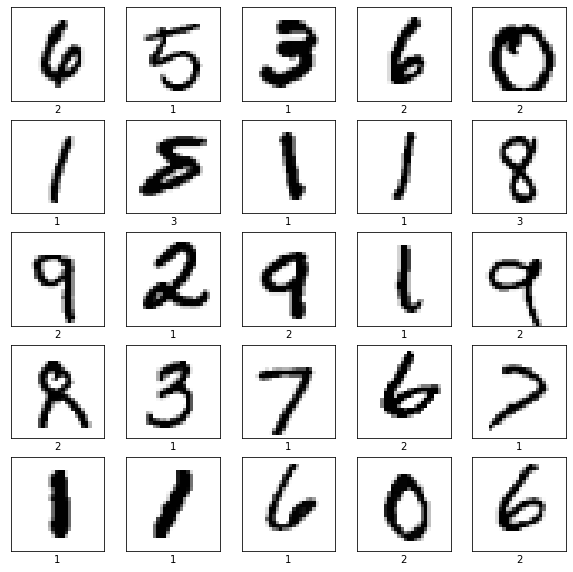

In [0]:
#visualize the white regions results
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indices[i]], cmap=plt.cm.binary)
    plt.xlabel(white_region_counts_train[indices[i]])
plt.show()

## Calculate height of each digit

In [0]:
#method to determine normalized height of digit
def height(digit):
  #find row index of top pixel
  index = 0
  #loop until nonwhite pixel found
  while(np.count_nonzero(digit[index]) == 0 and index < 28):
    index = index + 1
  top_pixel = index

  #find row index of bottom pixel
  index = 27
  while(np.count_nonzero(digit[index]) == 0 and index > -1):
    index = index - 1
  bottom_pixel = index

  #caclulate normalized height
  return (bottom_pixel - top_pixel) / 28.0

In [0]:
#calculate height for all training and testing images
start_time_heights_train = time.time()
heights_train = [height(x) for x in train_images]
end_time_heights_train = time.time()

start_time_heights_test = time.time()
heights_test = [height(x) for x in test_images]
end_time_heights_test = time.time()

In [0]:
#print time results
#print time results
print("Height code took " + str((end_time_heights_train - start_time_heights_train)) + " seconds to run for the 60,000 training images")
print("Height code took " + str((end_time_heights_test - start_time_heights_test)) + " seconds to run for the 10,000 test images")

Height code took 0.6651179790496826 seconds to run for the 60,000 training images
Height code took 0.1069343090057373 seconds to run for the 10,000 test images


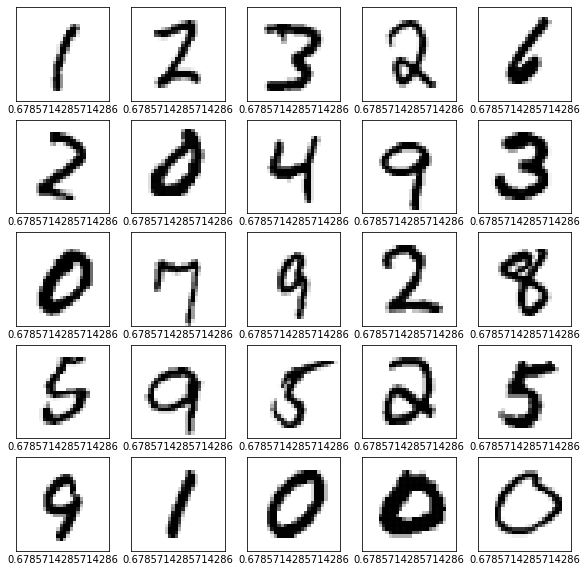

In [0]:
#visualize the height results
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indices[i]], cmap=plt.cm.binary)
    plt.xlabel(heights_train[indices[i]])
plt.show()

## Calculate width of each digit

In [0]:
#method to determine normalized width of digit
def width(digit):
  #rotate digit 90 degrees so that columns are now rows
  #height function will take it from here
  return height(np.rot90(digit))

In [0]:
#calculate width for all training and testing images
start_time_widths_train = time.time()
widths_train = [width(x) for x in train_images]
end_time_widths_train = time.time()

start_time_widths_test = time.time()
widths_test = [width(x) for x in test_images]
end_time_widths_test = time.time()

In [0]:
#print time results
print("Width code took " + str((end_time_widths_train - start_time_widths_train)) + " seconds to run for the 60,000 training images")
print("Width code took " + str((end_time_widths_test - start_time_widths_test)) + " seconds to run for the 10,000 test images")

Width code took 1.532118320465088 seconds to run for the 60,000 training images
Width code took 0.2446584701538086 seconds to run for the 10,000 test images


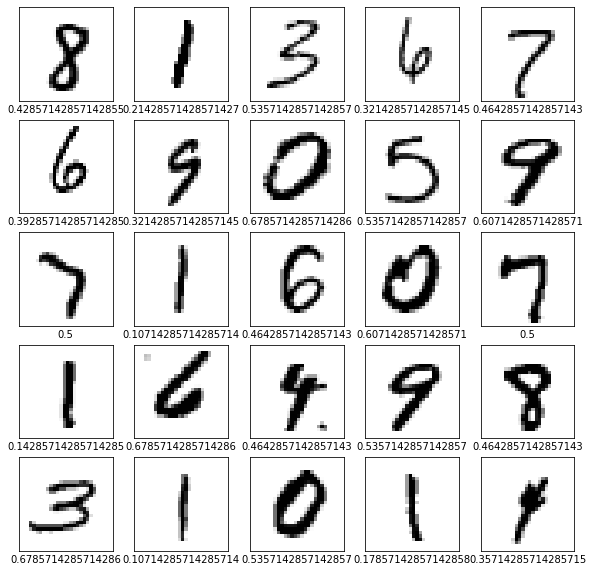

In [0]:
#visualize the width results
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indices[i]], cmap=plt.cm.binary)
    plt.xlabel(widths_train[indices[i]])
plt.show()

## Create and Test Model

In [0]:
#pre-process the data

#start with flattened, normalized images
training_input = np.reshape(train_images, (60000, 784)) / 255.0 
test_input = np.reshape(test_images, (10000, 784)) / 255.0 

#add heights
heights_train = np.reshape(heights_train, (60000, 1))
training_input = np.concatenate((training_input, heights_train), axis=1) 
heights_test = np.reshape(heights_test, (10000, 1))
test_input = np.concatenate((test_input, heights_test), axis=1) 

#add widths
widths_train = np.reshape(widths_train, (60000, 1))
training_input = np.concatenate((training_input, widths_train), axis=1) 
widths_test = np.reshape(widths_test, (10000, 1))
test_input = np.concatenate((test_input, widths_test), axis=1) 

#add number of white regions as one-hot encoded vector
one_hot_white_regions_train = [np.eye(5)[min(4,x)] for x in white_region_counts_train]
training_input = np.concatenate((training_input, one_hot_white_regions_train), axis=1) 
one_hot_white_regions_test = [np.eye(5)[min(4,x)] for x in white_region_counts_test]
test_input = np.concatenate((test_input, one_hot_white_regions_test), axis=1) 

(10000, 791)


In [0]:
#set up the layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(791,), activation=tf.nn.softmax)
])

In [0]:
#compile the model
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [0]:
#train the model
epochs = 10
history = model.fit(training_input, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_input, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1782 - acc: 0.9482 - val_loss: 0.2113 - val_acc: 0.9420
Epoch 2/10
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1780 - acc: 0.9489 - val_loss: 0.2078 - val_acc: 0.9434
Epoch 3/10
60000/60000 [==============================] - 3s 47us/sample - loss: 0.1770 - acc: 0.9486 - val_loss: 0.2081 - val_acc: 0.9430
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1765 - acc: 0.9493 - val_loss: 0.2125 - val_acc: 0.9429
Epoch 5/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1758 - acc: 0.9493 - val_loss: 0.2099 - val_acc: 0.9453
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1755 - acc: 0.9495 - val_loss: 0.2116 - val_acc: 0.9436
Epoch 7/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1748 - acc: 0.9498 - val_loss: 0.

In [0]:
#get the training history
history_dict = history.history
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

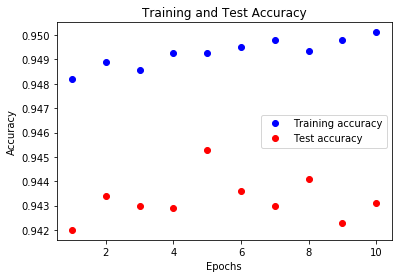

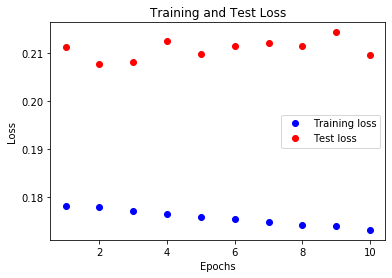

In [0]:
#visualize the results

#accuracy
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#loss
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()